In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import geopandas

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# !pip install geopandas

In [3]:
df = pd.read_csv("flights.csv")


In [4]:
number_original_df  = df.shape[0]
df.head()

id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01 05:00:00   United Air Lines Inc.  
1      1416     5      29  2013-01-01 05:00:00   United Air Lines Inc.  
2      1089     5      40  2013-01-01 05:00:00  American Airlines Inc.  
3      1576     5      45  2013-01-01 05:00:00         JetBlue Airways  
4       762     6       0  2013-01-01 06:00:00    Delta Air Lines Inc.

In [5]:
number_after_dropping  = df.shape[0]
df.shape


(336776, 21)

# 2)Data Cleaning/Processing

## 1)Removing Duplicates

In [6]:
df.drop_duplicates()
df.shape
print( "Number of Rows dropped due to duplicates: {}".format(number_original_df-number_after_dropping))

Number of Rows dropped due to duplicates: 0


#### This shows that there are no duplicates in our dataset

## 2)Checking for missing values

In [7]:

missing_data = df.isnull().sum()
print(missing_data)
columns_with_missing_values = missing_data[missing_data > 0].index
for column in columns_with_missing_values:
    df = df.dropna(subset=[column])
number_after_missing_values  = df.shape[0]
print( "Number of Rows dropped due to missing values handles in all coulumns: {}".format(number_original_df-number_after_missing_values))

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64
Number of Rows dropped due to missing values handles in all coulumns: 9430


In [8]:
missing_data = df.isnull().sum()
print(missing_data)
df.shape

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64


(327346, 21)

### 3)Converting time_hour into pandas date-time format

In [9]:
df['time_hour'] = pd.to_datetime(df['time_hour'])



# 4)Standardizing Name Data

We are performing uppercase operation on the name column of the airlines

In [10]:
df['name'] = df['name'].str.upper()
df['name'][:100]


0      UNITED AIR LINES INC.
1      UNITED AIR LINES INC.
2     AMERICAN AIRLINES INC.
3            JETBLUE AIRWAYS
4       DELTA AIR LINES INC.
               ...          
95     UNITED AIR LINES INC.
96                 ENVOY AIR
97      DELTA AIR LINES INC.
98     UNITED AIR LINES INC.
99           US AIRWAYS INC.
Name: name, Length: 100, dtype: object

# 5)Outlier function

### In our data we have arry_delay and departure_delay two columns that are real numbers we would like to check the outliers and perform outliers cleaning

In [11]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[col_name] >= Q1 - 1.5 * IQR) & (df[col_name] <= Q3 + 1.5 * IQR)
    return df.loc[filter]



### Displaying data with outliers

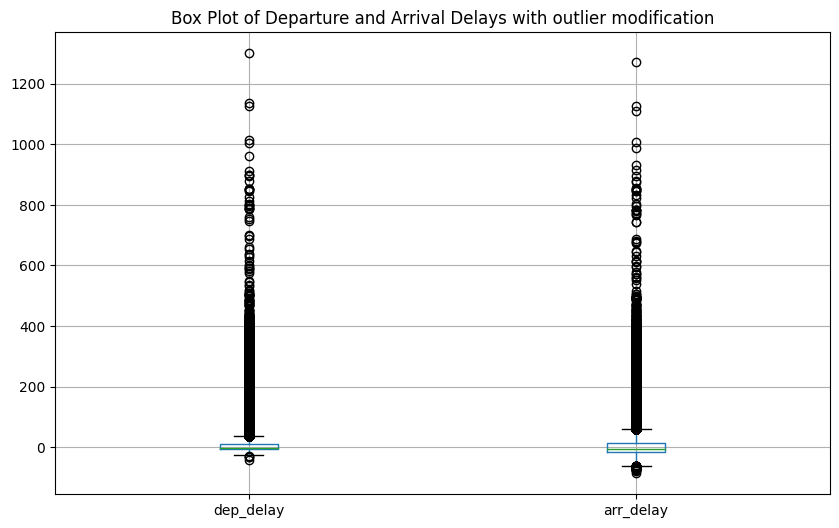

(327346, 21)

In [12]:

plt.figure(figsize=(10, 6))
df.boxplot(column=['dep_delay', 'arr_delay'])
plt.title('Box Plot of Departure and Arrival Delays with outlier modification')
plt.show()
df.shape

In [13]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[col_name] >= Q1 - 1.5 * IQR) & (df[col_name] <= Q3 + 1.5 * IQR)
    return df.loc[filter]


df = remove_outliers(df, 'arr_delay')
df = remove_outliers(df, 'dep_delay')

df.shape

(264579, 21)

### Displaying data without outliers

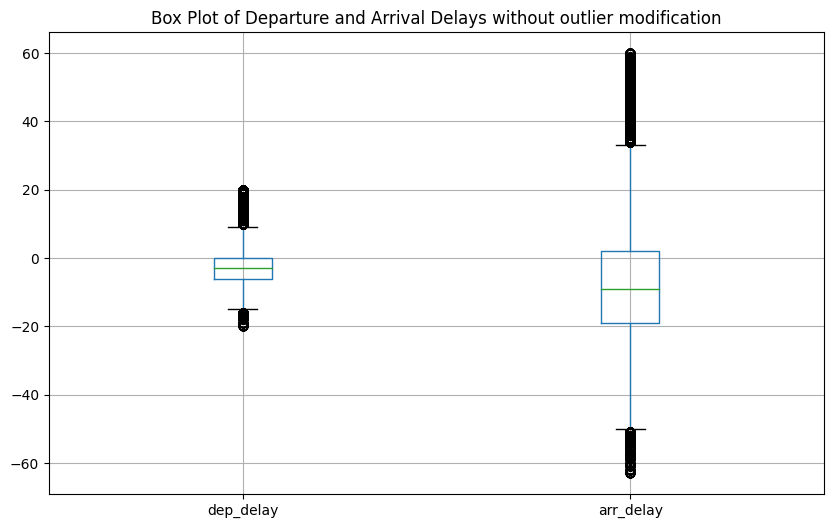

In [14]:

plt.figure(figsize=(10, 6))
df.boxplot(column=['dep_delay', 'arr_delay'])
plt.title('Box Plot of Departure and Arrival Delays without outlier modification')
plt.show()

### 6)Feature engineering

### Adding a new feature named total delay that is the sum of departure_delay and Arrival_delay

In [15]:
df['total_delay'] = df['arr_delay'] + df['dep_delay']


Creating a new feature delay_category that is
no_delay[1] if total_delay = 0
short_delay[1] if  0< total_delay <=10
delay[1] if 10< total_delay <=60
long_delay[1] if total_delay = 0

In [16]:
df['delay_category'] = pd.cut(df['total_delay'], bins=[-np.inf, 0, 10, 60, np.inf], labels=['No delay', 'Short delay', 'Medium delay', 'Long delay'])
df.shape

(264579, 23)

### 7)Adding a new feature named departure_hour_bin that is we are catorizing the day into 4 bins of six hours each

In [17]:
four_bins = [0, 6, 12, 18, 24]
labels = ['Early-morning', 'Morning', 'Afternoon', 'Evening']
df['departure_hour_bin'] = pd.cut(df['hour'], bins=four_bins, labels=labels, right=False, include_lowest=True)


### 8) Dropping Year since its an year long data set and 2013 has no significane and adds no vale sicne all rows are same.

In [18]:
df = df.drop(columns=['year'])
df.head()

id  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0      1    1     517.0             515        2.0     830.0   
1   1      1    1     533.0             529        4.0     850.0   
2   2      1    1     542.0             540        2.0     923.0   
3   3      1    1     544.0             545       -1.0    1004.0   
4   4      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute           time_hour                    name  \
0      1400     5      15 2013-01-01 05:00:00   UNITED AIR LINES INC.   
1      1416     5      29 2013-01-01 05:00:00   UNITED AIR LINES INC.   
2      1089     5      40 2013-01-01 05:00:00  AMERICAN AIRLINES INC.   
3      1576     5      45 2013-01-01 05:00:00         JETBLUE AIRWAYS   
4       762     6       0 2013-01-01 06:00:00    DELTA AIR LINES INC.   

   total_delay delay_category departure_hour_bin  
0         13.0   Medium delay      Early-morning  
1         24.0   Medium delay      Early-morning  
2         35.0   Medium delay      Early-morning  
3        -19.0       No delay      Early-morning  
4        -31.0       No delay            Morning

### 9) Converting name of the airlines to categorical variable as there are 16 airlines in total

In [19]:
df["name"] = df["name"].astype('category')
df["name"].unique()
print(len(df["name"].unique()),df["name"].unique())

16 ['UNITED AIR LINES INC.', 'AMERICAN AIRLINES INC.', 'JETBLUE AIRWAYS', 'DELTA AIR LINES INC.', 'EXPRESSJET AIRLINES INC.', ..., 'ENDEAVOR AIR INC.', 'FRONTIER AIRLINES INC.', 'HAWAIIAN AIRLINES INC.', 'MESA AIRLINES INC.', 'SKYWEST AIRLINES INC.']
Length: 16
Categories (16, object): ['AIRTRAN AIRWAYS CORPORATION', 'ALASKA AIRLINES INC.', 'AMERICAN AIRLINES INC.', 'DELTA AIR LINES INC.', ..., 'SOUTHWEST AIRLINES CO.', 'UNITED AIR LINES INC.', 'US AIRWAYS INC.', 'VIRGIN AMERICA']


### 10) Normalizing the features such as dep_delay, arr_delay, total_delay


While this step is present, here we dont want to visualize data after normalizing we would like to capture the raw distributiuon, oulier understanding, distribution and others.

In [20]:
numeric_cols = ['total_delay','dep_delay','arr_delay']
for column in numeric_cols:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


# 3)Exploratory Data Analysis (EDA)

Now we have completed the Data cleaning processing. We have added some new featuers that are important to our analyis, we have also dropped some features such as year since it has no significant importance in the data. The next steps are to Explore the data and capture meaningful relations

In [21]:
df.head(1)

id  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0      1    1     517.0             515       0.55     830.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819   0.601626      UA    1545  N14228    EWR  IAH     227.0   

   distance  hour  minute           time_hour                   name  \
0      1400     5      15 2013-01-01 05:00:00  UNITED AIR LINES INC.   

   total_delay delay_category departure_hour_bin  
0     0.588957   Medium delay      Early-morning

# Phase 2 Starts Here.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Convert the data into individual Colums Of date and month and Year

In [23]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['hour'] = df['time_hour'].dt.hour
df.drop('time_hour', axis=1, inplace=True)



In [24]:
df.head(10)

id  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0      1    1     517.0             515      0.550     830.0   
1   1      1    1     533.0             529      0.600     850.0   
2   2      1    1     542.0             540      0.550     923.0   
3   3      1    1     544.0             545      0.475    1004.0   
4   4      1    1     554.0             600      0.350     812.0   
5   5      1    1     554.0             558      0.400     740.0   
6   6      1    1     555.0             600      0.375     913.0   
7   7      1    1     557.0             600      0.425     709.0   
8   8      1    1     557.0             600      0.425     838.0   
9   9      1    1     558.0             600      0.450     753.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819   0.601626      UA    1545  N14228    EWR  IAH     227.0   
1             830   0.674797      UA    1714  N24211    LGA  IAH     227.0   
2             850   0.780488      AA    1141  N619AA    JFK  MIA     160.0   
3            1022   0.365854      B6     725  N804JB    JFK  BQN     183.0   
4             837   0.308943      DL     461  N668DN    LGA  ATL     116.0   
5             728   0.609756      UA    1696  N39463    EWR  ORD     150.0   
6             854   0.666667      B6     507  N516JB    EWR  FLL     158.0   
7             723   0.398374      EV    5708  N829AS    LGA  IAD      53.0   
8             846   0.447154      B6      79  N593JB    JFK  MCO     140.0   
9             745   0.577236      AA     301  N3ALAA    LGA  ORD     138.0   

   distance  hour  minute                      name  total_delay  \
0      1400     5      15     UNITED AIR LINES INC.     0.588957   
1      1416     5      29     UNITED AIR LINES INC.     0.656442   
2      1089     5      40    AMERICAN AIRLINES INC.     0.723926   
3      1576     5      45           JETBLUE AIRWAYS     0.392638   
4       762     6       0      DELTA AIR LINES INC.     0.319018   
5       719     5      58     UNITED AIR LINES INC.     0.558282   
6      1065     6       0           JETBLUE AIRWAYS     0.595092   
7       229     6       0  EXPRESSJET AIRLINES INC.     0.404908   
8       944     6       0           JETBLUE AIRWAYS     0.441718   
9       733     6       0    AMERICAN AIRLINES INC.     0.546012   

  delay_category departure_hour_bin  year  
0   Medium delay      Early-morning  2013  
1   Medium delay      Early-morning  2013  
2   Medium delay      Early-morning  2013  
3       No delay      Early-morning  2013  
4       No delay            Morning  2013  
5    Short delay      Early-morning  2013  
6   Medium delay            Morning  2013  
7       No delay            Morning  2013  
8       No delay            Morning  2013  
9    Short delay            Morning  2013

## COnverting the delay category as a classification problem sicne we have 4 delay category In our dataset No-delay, Short delay, Medium delay and long delay

In [25]:
cat_features = ['carrier', 'origin', 'dest', 'departure_hour_bin', 'name']
numeric_features = ['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'distance', 'air_time', 'hour', 'minute', 'total_delay', 'year']
target = 'delay_category'


X = df[cat_features + numeric_features]
y = df[target]


categorical_data_change = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_data_chnange = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


preprocessor_data_cat_prediction = ColumnTransformer(
    transformers=[
        ('num', numeric_data_chnange, numeric_features),
        ('cat', categorical_data_change, cat_features)
    ])



## We have picked up six classification models while selecting the delay category as our predection variable

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

  Long delay       1.00      0.88      0.94       165
Medium delay       1.00      1.00      1.00      8125
    No delay       1.00      1.00      1.00     38639
 Short delay       1.00      0.99      1.00      5987

    accuracy                           1.00     52916
   macro avg       1.00      0.97      0.98     52916
weighted avg       1.00      1.00      1.00     52916

Accuracy Score: 0.9989039231990324


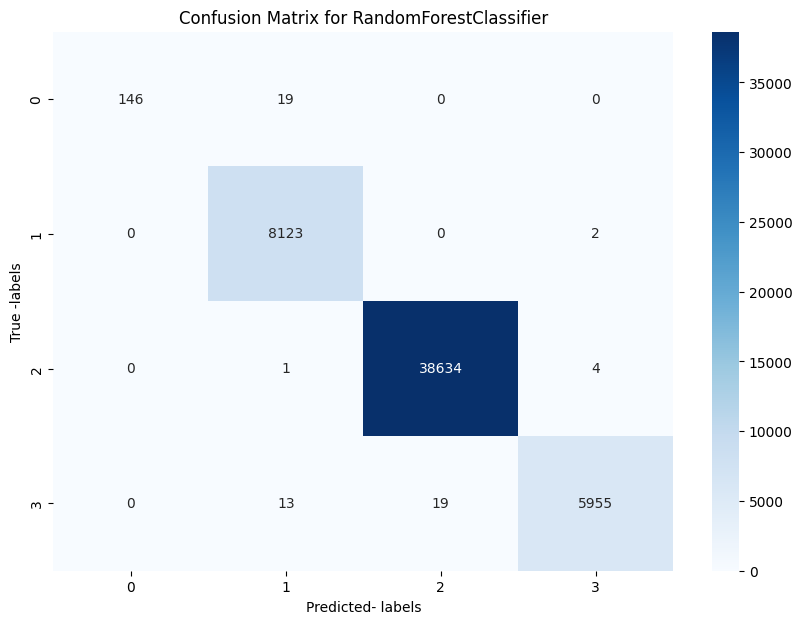

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

  Long delay       0.99      0.87      0.93       165
Medium delay       1.00      1.00      1.00      8125
    No delay       1.00      1.00      1.00     38639
 Short delay       1.00      1.00      1.00      5987

    accuracy                           1.00     52916
   macro avg       1.00      0.97      0.98     52916
weighted avg       1.00      1.00      1.00     52916

Accuracy Score: 0.9995653488547888


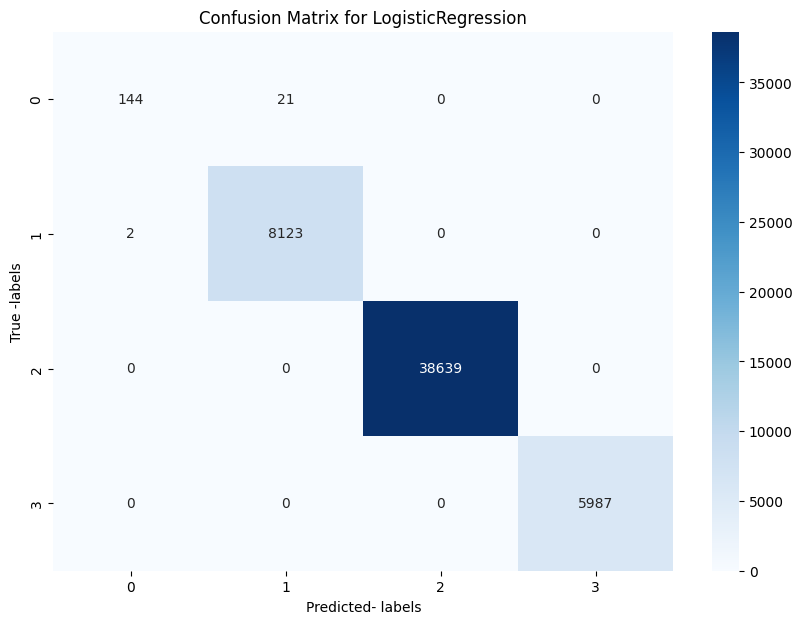

Model: SupportVectorMachine
Classification Report:
               precision    recall  f1-score   support

  Long delay       0.89      0.96      0.92       165
Medium delay       1.00      0.98      0.99      8125
    No delay       1.00      0.97      0.99     38639
 Short delay       0.84      1.00      0.91      5987

    accuracy                           0.98     52916
   macro avg       0.93      0.98      0.95     52916
weighted avg       0.98      0.98      0.98     52916

Accuracy Score: 0.978040668228891


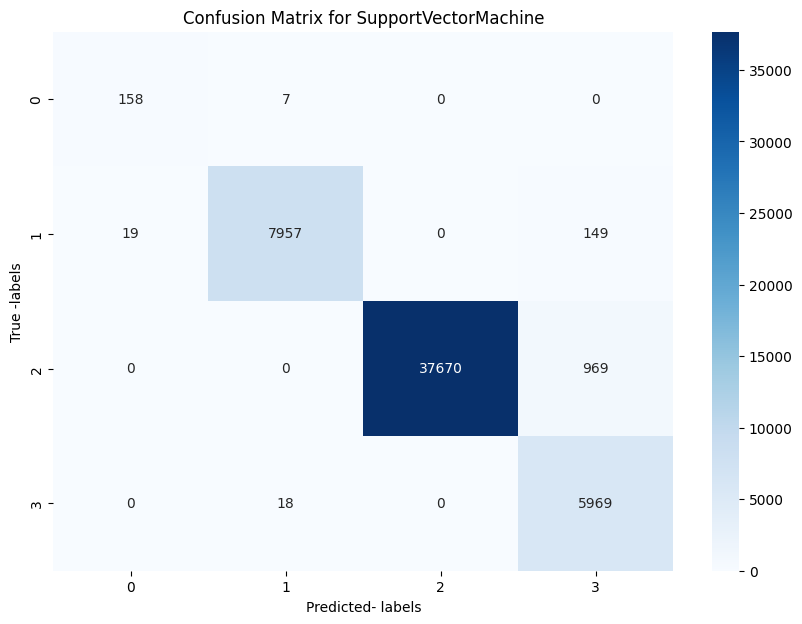

Model: KNeighborsClassifier
Classification Report:
               precision    recall  f1-score   support

  Long delay       0.95      0.13      0.22       165
Medium delay       0.82      0.79      0.81      8125
    No delay       0.91      0.98      0.95     38639
 Short delay       0.49      0.28      0.36      5987

    accuracy                           0.87     52916
   macro avg       0.79      0.55      0.58     52916
weighted avg       0.85      0.87      0.86     52916

Accuracy Score: 0.8706818353617053


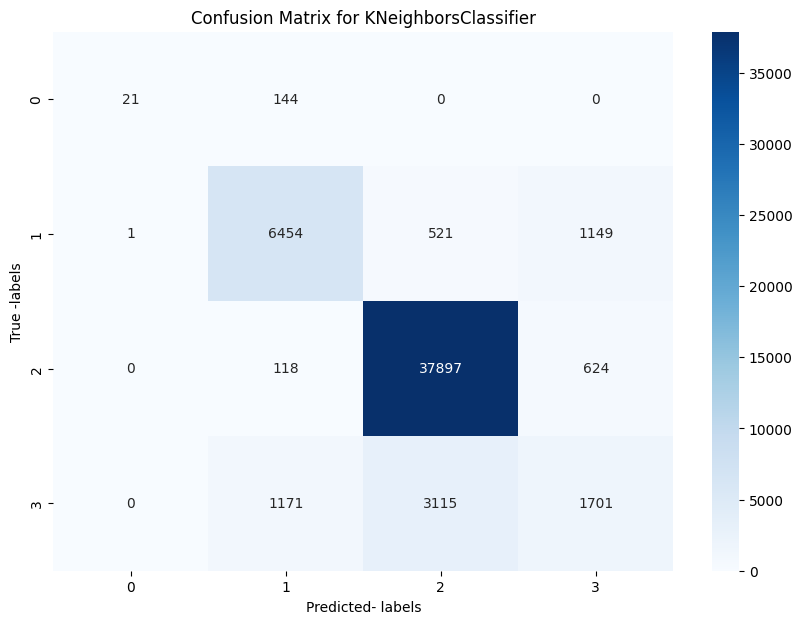

Model: ExtraTreesClassifier
Classification Report:
               precision    recall  f1-score   support

  Long delay       0.96      0.15      0.26       165
Medium delay       0.89      0.91      0.90      8125
    No delay       0.94      0.99      0.96     38639
 Short delay       0.78      0.50      0.61      5987

    accuracy                           0.92     52916
   macro avg       0.89      0.64      0.68     52916
weighted avg       0.91      0.92      0.91     52916

Accuracy Score: 0.9204021467986998


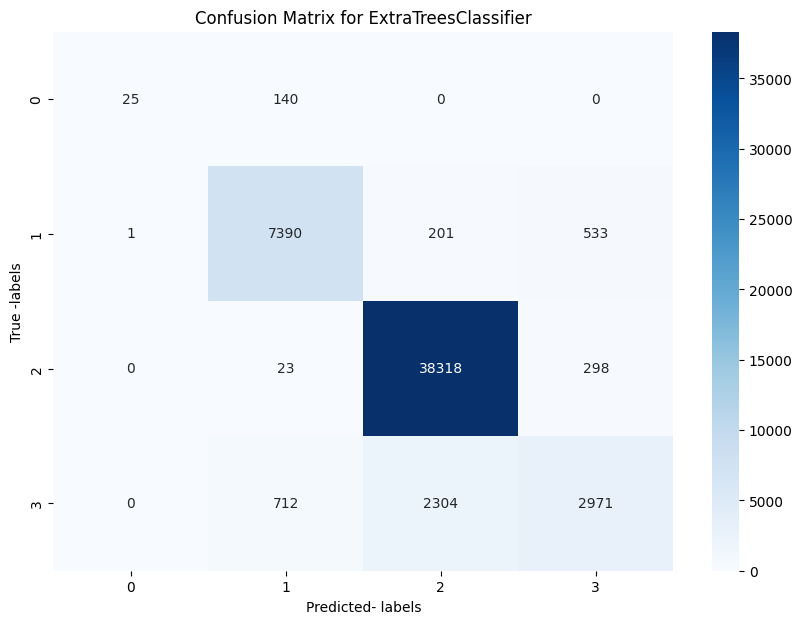

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

  Long delay       0.00      0.00      0.00       165
Medium delay       0.88      0.94      0.91      8125
    No delay       0.87      1.00      0.93     38639
 Short delay       0.50      0.00      0.00      5987

    accuracy                           0.88     52916
   macro avg       0.56      0.49      0.46     52916
weighted avg       0.83      0.88      0.82     52916

Accuracy Score: 0.8752740192002418


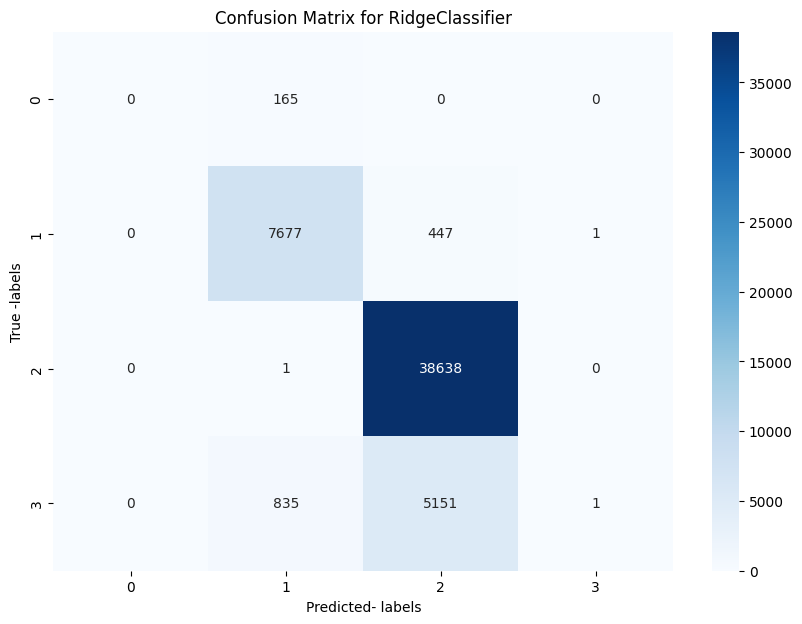

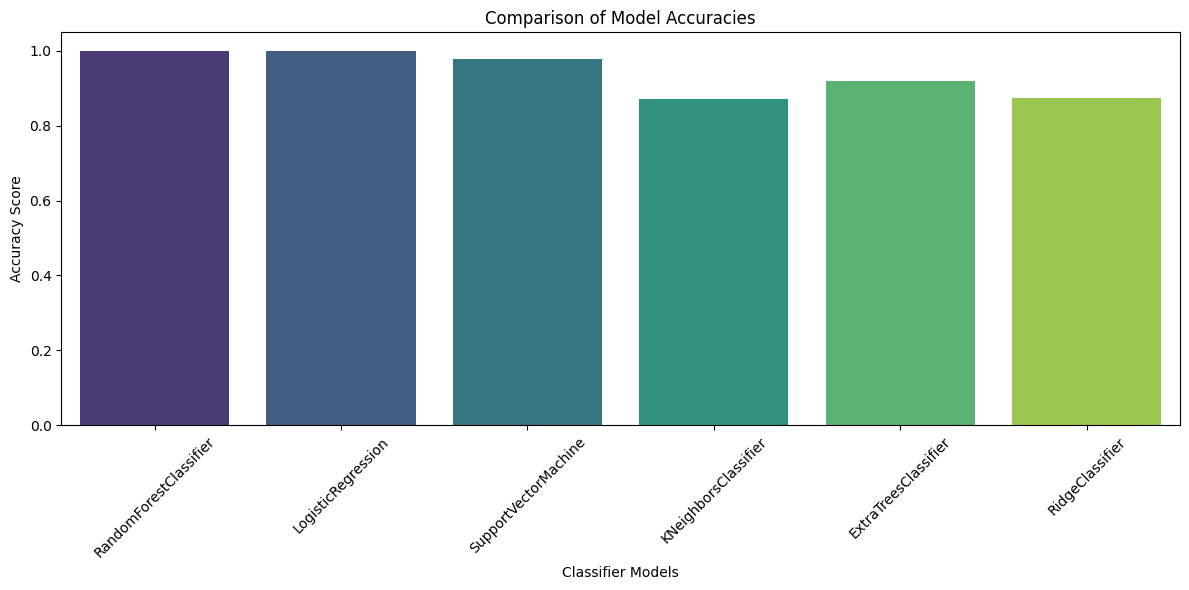

In [26]:

# new_X2 = X[:10000]
# new_y2 = y[:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(new_X2, new_y2, test_size=0.2, random_state=42)
    
pipelines_catagorical = {
    'RandomForestClassifier': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', RandomForestClassifier(n_estimators=50,class_weight='balanced', random_state=42))
    ]),
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'SupportVectorMachine': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', SVC(class_weight='balanced', random_state=42))
    ]),
    'KNeighborsClassifier': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', KNeighborsClassifier())
    ]),
    'ExtraTreesClassifier': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', ExtraTreesClassifier(random_state=42))
    ]),
    'RidgeClassifier': Pipeline([
        ('preprocessor', preprocessor_data_cat_prediction),
        ('classifier', RidgeClassifier(random_state=42))
    ])
}
cat_accuracy_scores = {}
for model_name, pipeline in pipelines_catagorical.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    # print(accuracy)
    cat_accuracy_scores[model_name] = accuracy
    # print(cat_accuracy_scores)
    print("Model: {}".format(model_name))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Accuracy Score:", accuracy)
    print("=" * 100)
    confuson_matirx = confusion_matrix(y_test, y_pred)
    # print(confuson_matirx)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confuson_matirx, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for {}'.format(model_name))
    plt.ylabel('True -labels')
    plt.xlabel('Predicted- labels')
    plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=list(cat_accuracy_scores.keys()), y=list(cat_accuracy_scores.values()), palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy Score')
plt.xlabel('Classifier Models')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


In [ ]:
type(X_train)

In [ ]:
df.head(10)

## We have picked up six Regression models while selecting the arr_delay as our predection variable

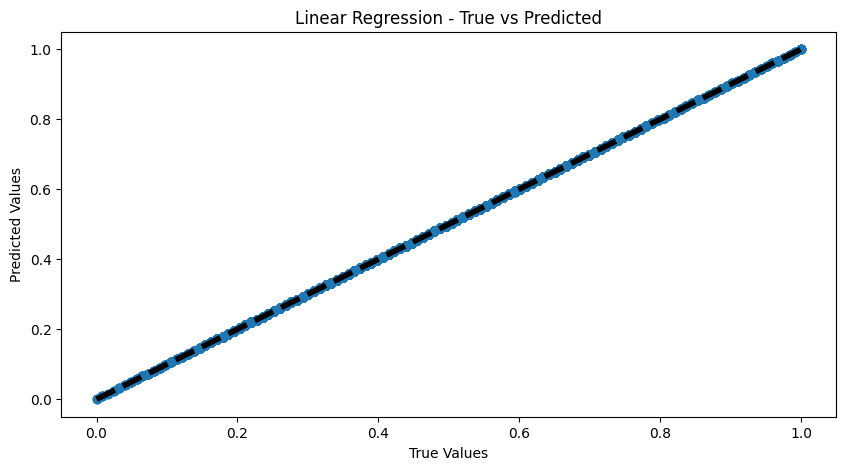

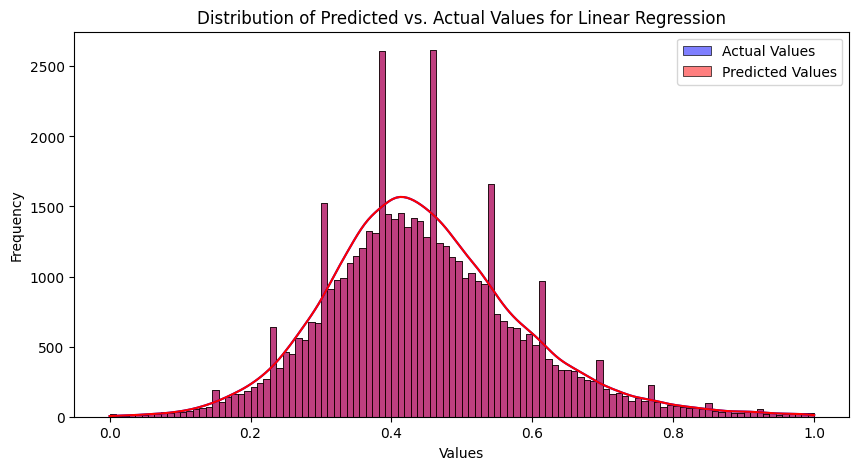

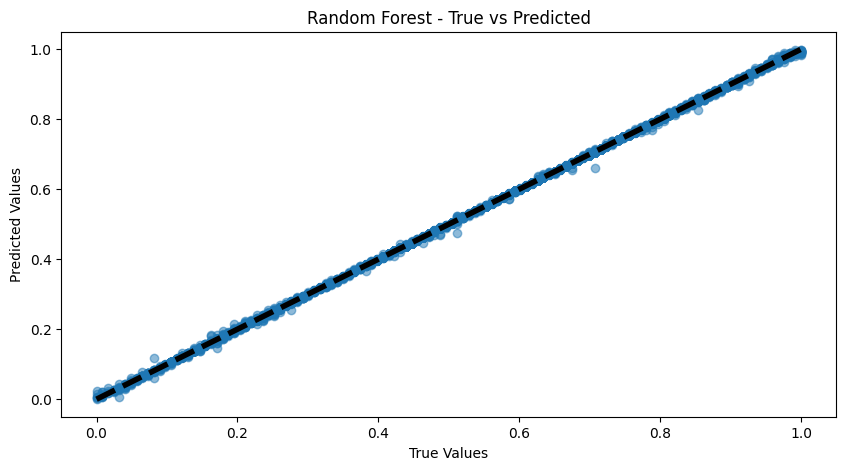

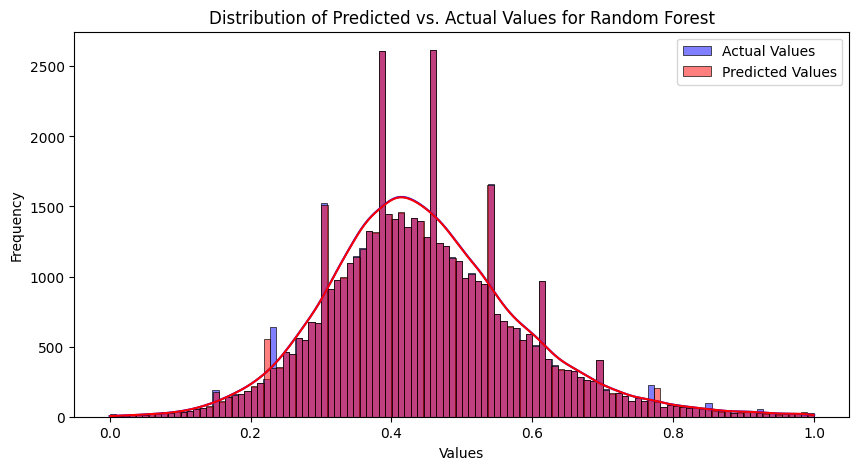

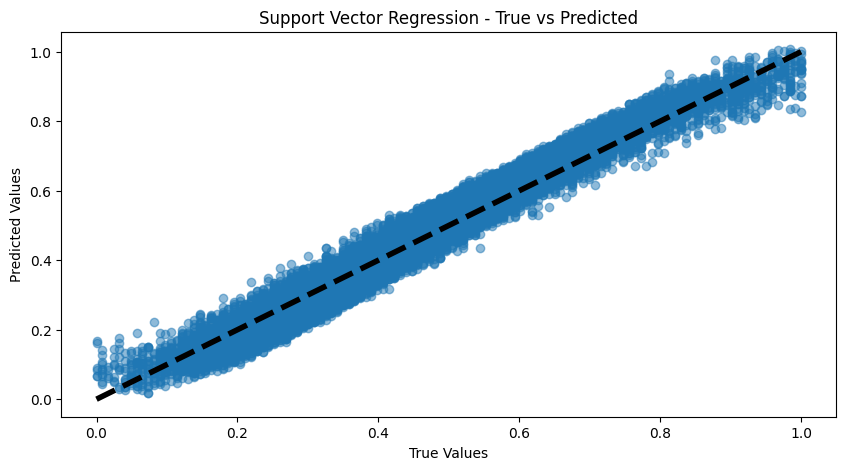

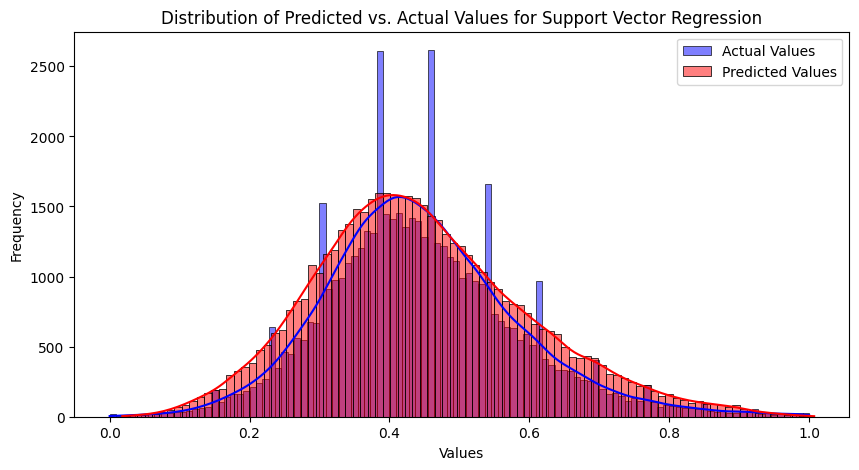

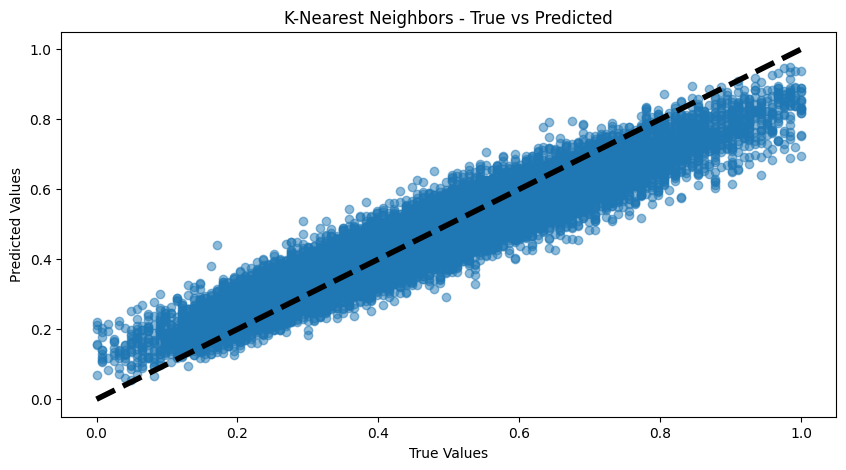

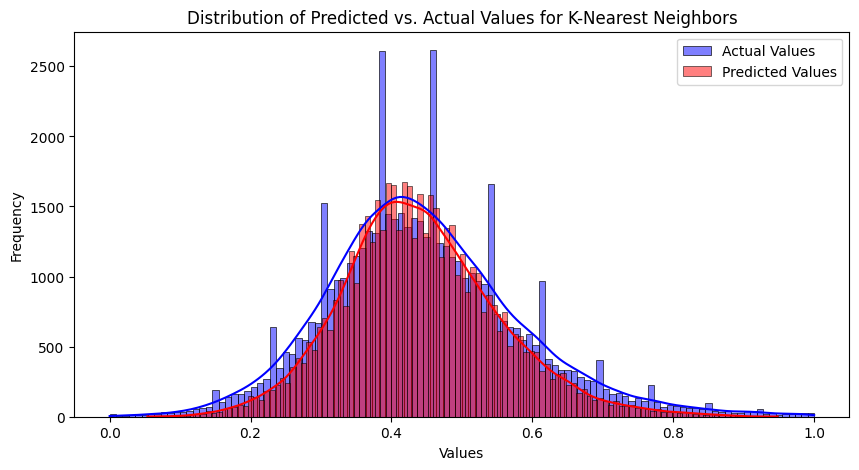

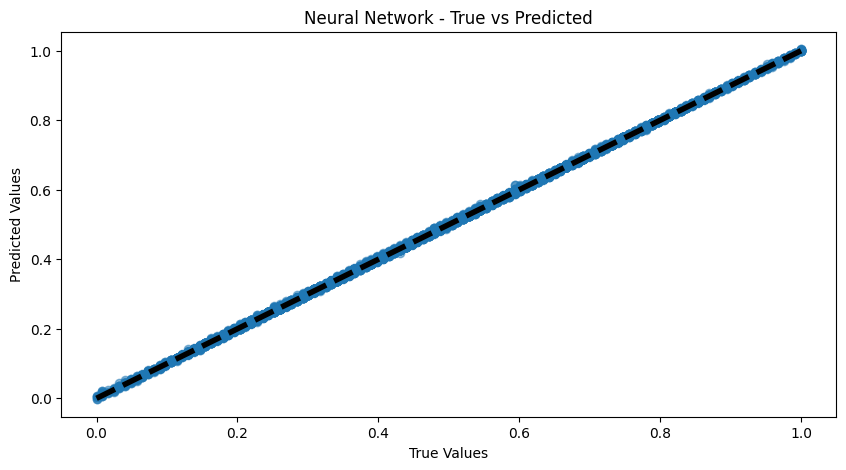

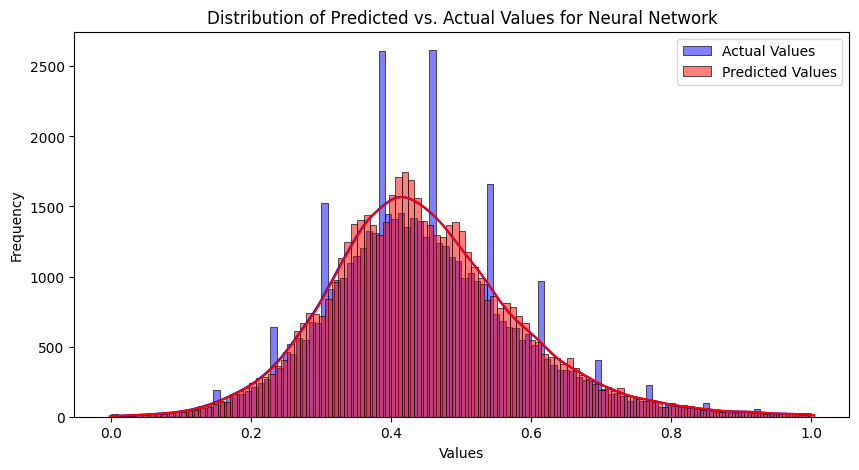

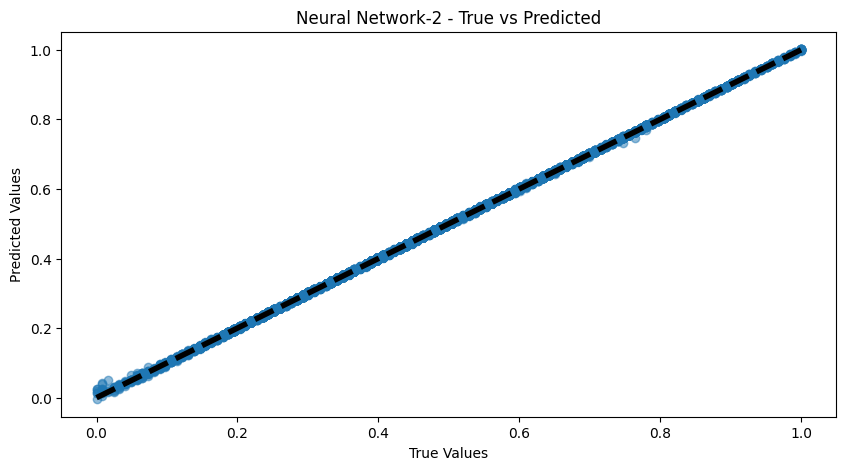

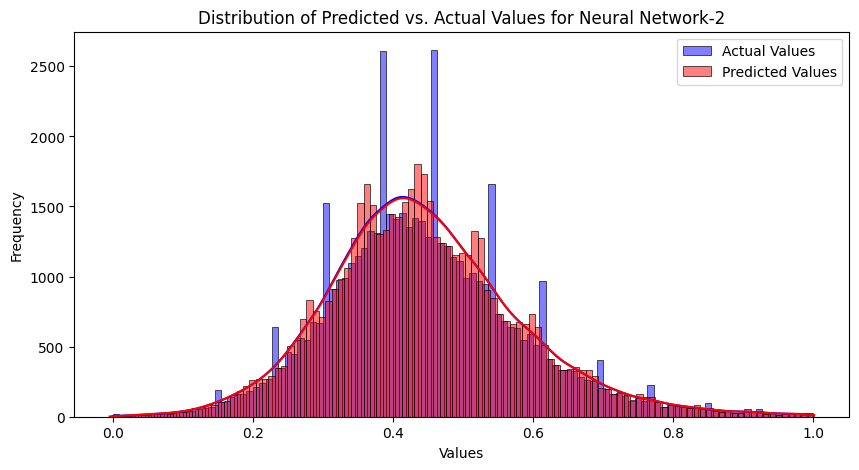

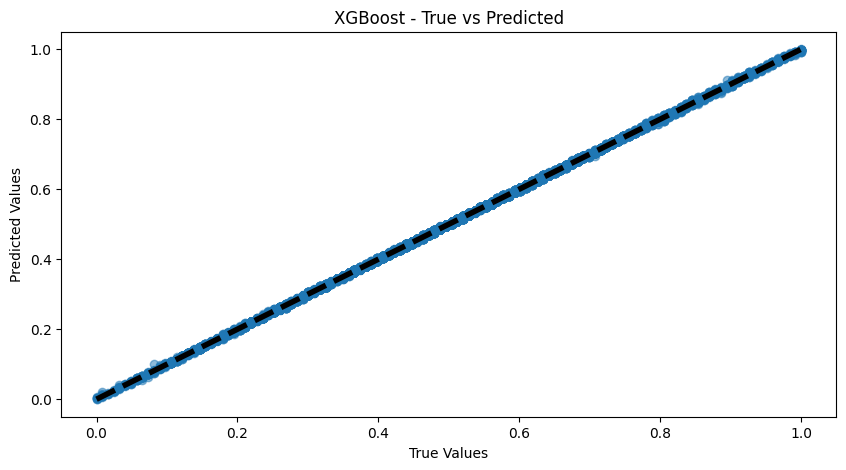

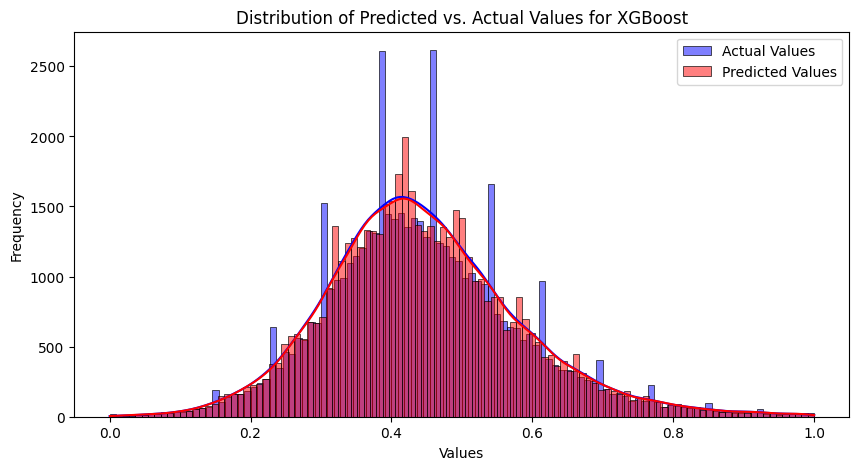

Linear Regression - Mean Squared Error: 2.41631693645016e-12
Linear Regression - Mean Absolute Error: 7.107062096711016e-07
Linear Regression - R-squared: 1.0000
Random Forest - Mean Squared Error: 6.090689588524755e-07
Random Forest - Mean Absolute Error: 8.253608879763282e-05
Random Forest - R-squared: 1.0000
Support Vector Regression - Mean Squared Error: 0.0010866082245814923
Support Vector Regression - Mean Absolute Error: 0.026175495783050767
Support Vector Regression - R-squared: 0.9439
K-Nearest Neighbors - Mean Squared Error: 0.0024015785408587416
K-Nearest Neighbors - Mean Absolute Error: 0.03668686127484149
K-Nearest Neighbors - R-squared: 0.8759
Neural Network - Mean Squared Error: 3.5450458239556703e-06
Neural Network - Mean Absolute Error: 0.0014608161898835063
Neural Network - R-squared: 0.9998
Neural Network-2 - Mean Squared Error: 1.734219685396274e-06
Neural Network-2 - Mean Absolute Error: 0.0010260012415923584
Neural Network-2 - R-squared: 0.9999
XGBoost - Mean Squa

In [27]:
cat_features = ['carrier', 'origin', 'dest', 'departure_hour_bin', 'name']
numerical_features = ['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'distance', 'air_time', 'hour', 'minute', 'total_delay', 'year']


preprocessor_regressor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)
X = df[cat_features + numeric_features]
# y = df[target]
X = df.drop(['arr_delay'], axis=1)  
y = df['arr_delay']

# new_X = X[:10000]
# new_Y = y[:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)





six_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(random_state=42),
    'Neural Network-2': MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


results_of_six_models = {}

for name, model in six_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_regressor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results_of_six_models[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}


    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.title('{} - True vs Predicted'.format(name))
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(y_test, color="blue", label='Actual Values', kde=True)
    sns.histplot(y_pred, color="red", label='Predicted Values', kde=True)
    plt.title(f'Distribution of Predicted vs. Actual Values for {name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()




for name, metrics in results_of_six_models.items():
    print("{} - Mean Squared Error: {}".format(name, metrics['MSE']))
    print("{} - Mean Absolute Error: {}".format(name, metrics['MAE']))
    print("{} - R-squared: {:.4f}".format(name, metrics['R2']))



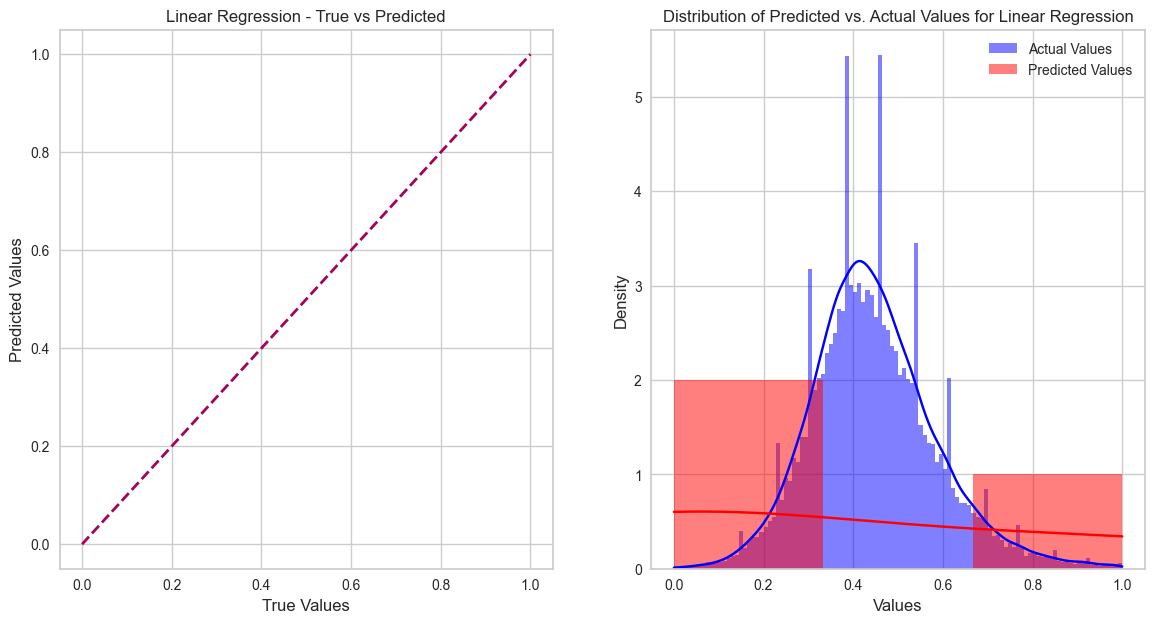

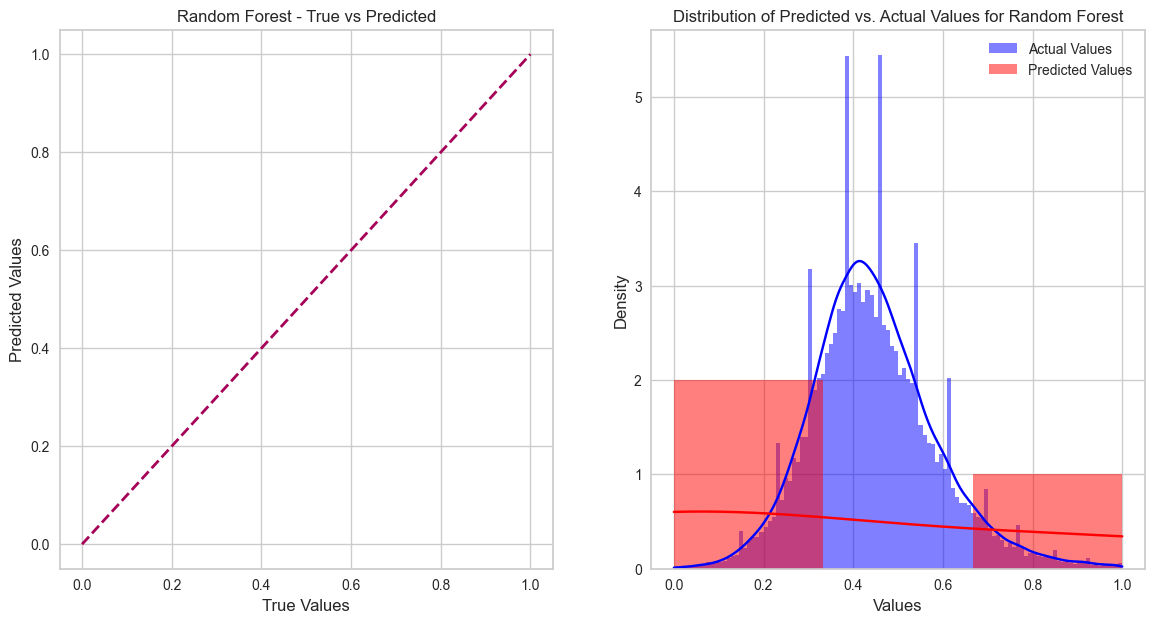

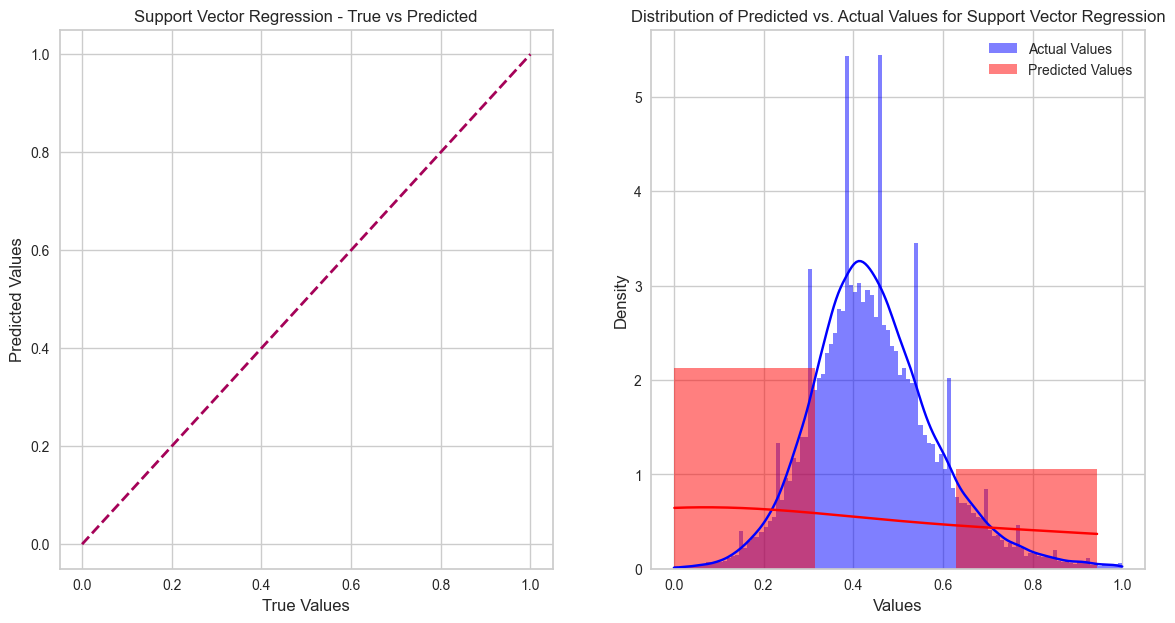

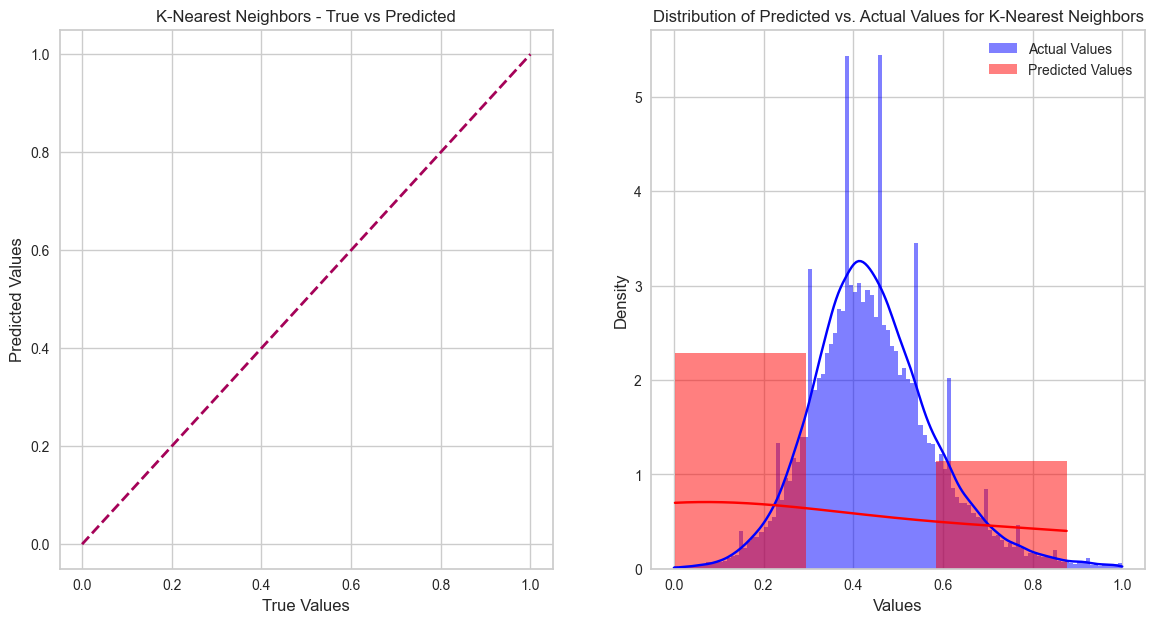

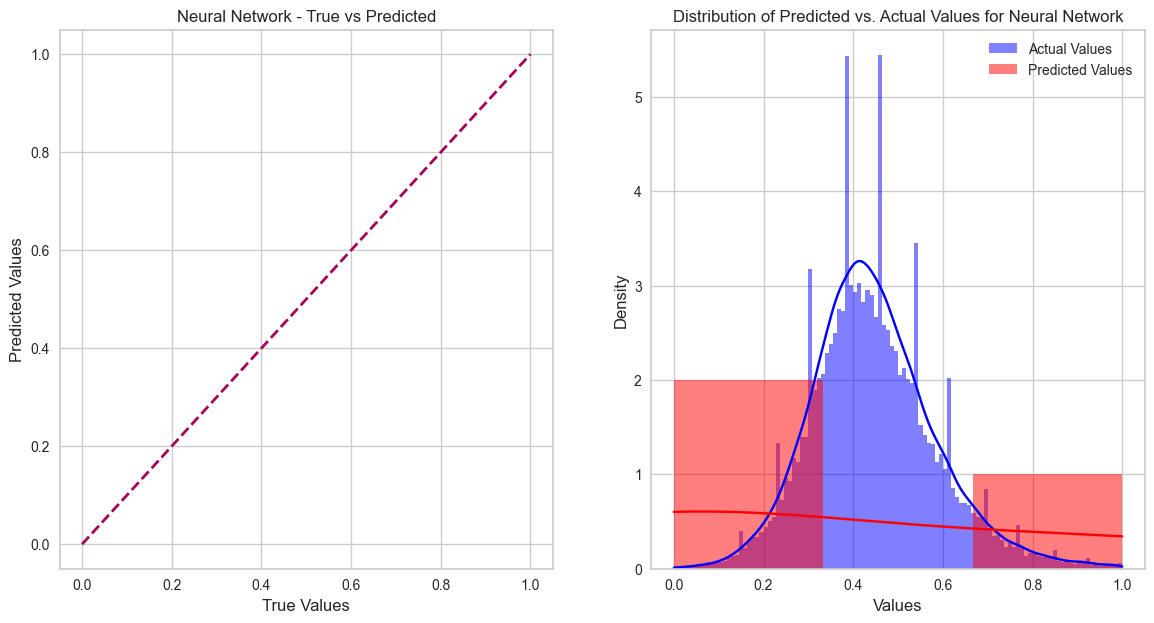

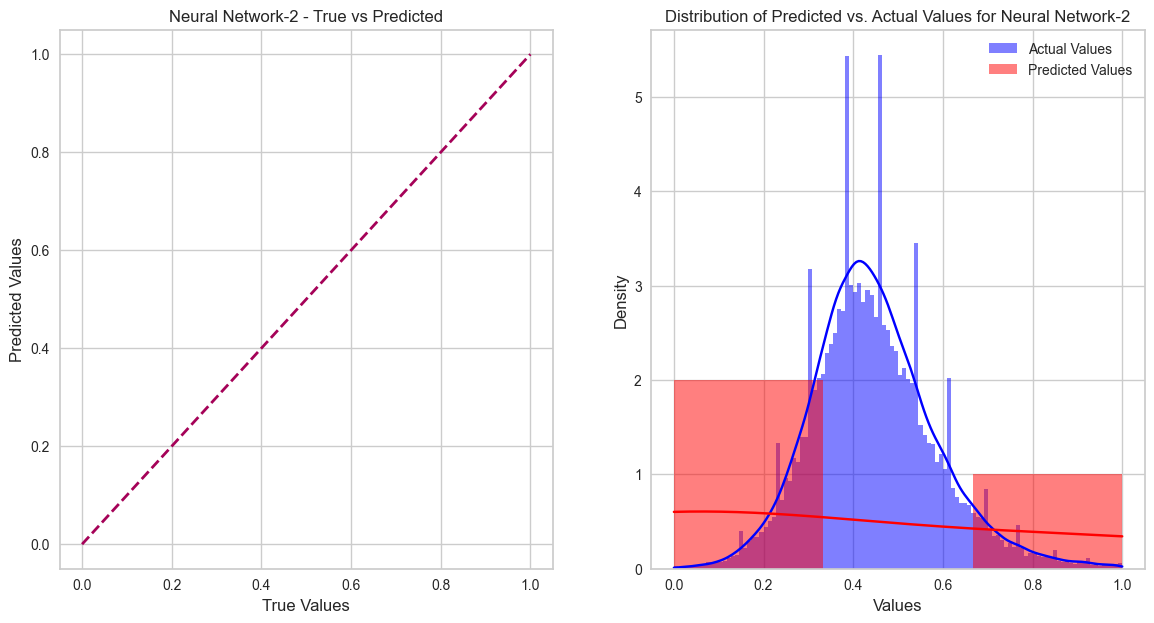

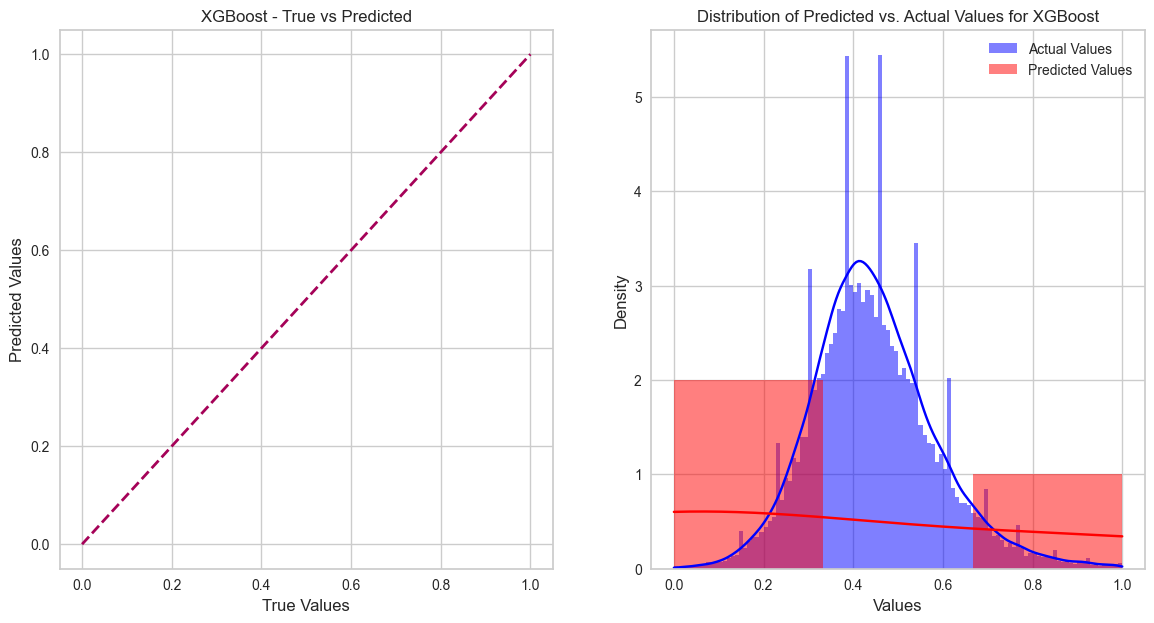

In [75]:
for model_name, y_pred in results_of_six_models.items():
    plt.figure(figsize=(14, 7))
    

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=2)
    plt.title(f'{model_name} - True vs Predicted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    

    plt.subplot(1, 2, 2)
    sns.histplot(y_test, color="blue", label='Actual Values', kde=True, stat="density", linewidth=0)
    sns.histplot(y_pred, color="red", label='Predicted Values', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of Predicted vs. Actual Values for {model_name}')
    plt.xlabel('Values')
    plt.legend()
    
    plt.show()
